#### Topics: Classification using SVM and Adaboost
#### Assigned: Wednesday May 9
#### Due: Sunday May 20
----------------------------------------


### Report 
##### With reference to the code and plots in the detailed report & code below

----------------------------------------

##### 1. SVM 






##### 2. ADABOOST



















# Code Section

In [2]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import numpy as np
from math import *
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from scipy.stats import norm
from IPython.display import Image, display, Math, Latex

# Params
n_inpoints = 200

C:\Users\Karma\Anaconda3\envs\tflo\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Mean:  (0, 0)   
Cov : [[2. 0.]
 [0. 1.]]
Mean:  (-2, 1)   
Cov : [[1.125 0.875]
 [0.875 1.125]]
Mean:  (3, 2)   
Cov : [[2. 1.]
 [1. 2.]]


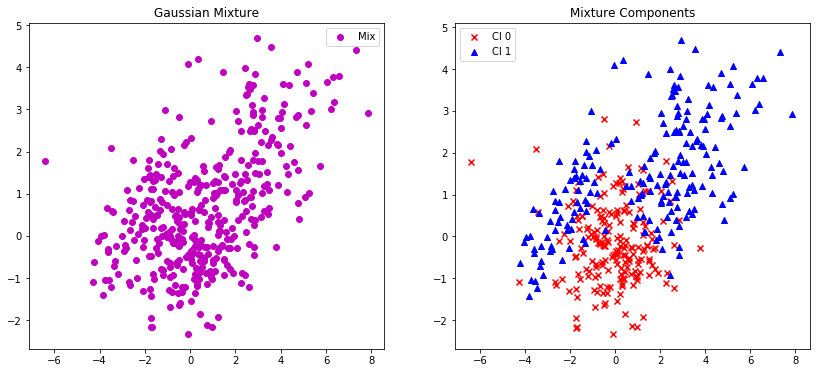

In [23]:
# Create Class 0
def generateClass0(): 
    theta0 = 0
    lmb01 = 2
    lmb02 = 1
    m0 = (0,  0)
    # computing u * u.T and later multiplying with lambda
    cov01 = [[(cos(theta0))**2,    cos(theta0)*sin(theta0)],
             [(sin(theta0))*cos(theta0), (sin(theta0))**2]]
    cov02 = [[(sin(theta0))**2,    -(cos(theta0)*sin(theta0))],
             [-(cos(theta0)*sin(theta0)), (cos(theta0))**2]]
    cov0 = lmb01*np.matrix(cov01) + lmb02*np.matrix(cov02)
    print('Mean: ',m0,' ','\nCov :',cov0)
    cov0_det = np.linalg.det(cov0)
    x0, y0 = np.random.multivariate_normal(m0, cov0, int(n_inpoints)).T
    return x0,y0

x01, x02 = generateClass0()

# Mixture A
def generateClass1a():
    theta1a = -3*pi/4
    lmb1a1 = 2
    lmb1a2 = 1/4
    m1a = (-2, 1)
    cov1a = [[(cos(theta1a))**2,    cos(theta1a)*sin(theta1a)],
             [(sin(theta1a))*cos(theta1a), (sin(theta1a))**2]]
    cov2a = [[(sin(theta1a))**2,    -(cos(theta1a)*sin(theta1a))],
             [-(cos(theta1a)*sin(theta1a)), (cos(theta1a))**2]]
    cov1a = lmb1a1*np.matrix(cov1a) + lmb1a2*np.matrix(cov2a)
    cov1a_det = np.linalg.det(cov1a)
    x1a, y1a = np.random.multivariate_normal(m1a, cov1a, int(n_inpoints)).T
    print('Mean: ',m1a,' ','\nCov :',cov1a)
    return x1a,y1a

# Mixture B
def generateClass1b():
    theta1b = pi/4
    lmb1b1 = 3
    lmb1b2 = 1
    m1b = (3, 2)
    cov1b = [[(cos(theta1b))**2,    cos(theta1b)*sin(theta1b)],
             [(sin(theta1b))*cos(theta1b), (sin(theta1b))**2]]
    cov2b = [[(sin(theta1b))**2,    -(cos(theta1b)*sin(theta1b))],
             [-(cos(theta1b)*sin(theta1b)), (cos(theta1b))**2]]
    cov1b = lmb1b1*np.matrix(cov1b) + lmb1b2*np.matrix(cov2b)
    cov1b_det = np.linalg.det(cov1b)
    x1b, y1b = np.random.multivariate_normal(m1b, cov1b, int(n_inpoints)).T
    print('Mean: ',m1b,' ','\nCov :',cov1b)
    return x1b,y1b

x11a, x12a = generateClass1a()
x11b, x12b = generateClass1b()

# Create Mixture in Class 1
cnt_x1 = [int(ceil(n_inpoints*(1/3))),int(floor(n_inpoints*(2/3)))] 
idx_x1a = np.argsort(np.random.random(n_inpoints))[:cnt_x1[0]]
idx_x1b = np.argsort(np.random.random(n_inpoints))[:cnt_x1[1]]
x11 = np.concatenate((np.array(x11a[idx_x1a]), np.array(x11b[idx_x1b])), axis = 0)
x12 = np.concatenate((np.array(x12a[idx_x1a]), np.array(x12b[idx_x1b])), axis = 0)

# ----------------------------------------
# Set up the [Xi, Yi] synthetic data 
# ----------------------------------------

# n_inpoints=200 samples each from class 0 and class 1
# Combine the arrays for the generated values
X1 = np.concatenate((x01, x11), axis = 0).reshape(n_inpoints*2,1)
X2 = np.concatenate((x02, x12), axis = 0).reshape(n_inpoints*2,1)
X = np.vstack((X1, X2)).T
Y = np.array([0]*int(n_inpoints) + [1]*int(n_inpoints)).reshape(n_inpoints*2,1)
#print('X1: ', X1.shape, ', X2:',X2.shape,', Y:',Y.shape)

cnt_split_data = [int(ceil(n_inpoints*(1/3))),int(floor(n_inpoints*(2/3)))] 


# Subplots 
f, (ax1, ax2) = plt.subplots(1,2,figsize=(14,6))
ax1.scatter(X1, X2, color = 'm',marker='o', label = 'Mix')
ax1.set_title('Gaussian Mixture')
ax1.legend()
ax2.scatter(x01, x02, color = 'r',marker='x', label = 'Cl 0')
ax2.scatter(x11, x12, color = 'b',marker='^', label = 'Cl 1')
ax2.set_title('Mixture Components')
ax2.legend()
f.subplots_adjust()
